Final Project
Members: Lam Nguyen; Vu Trinh; Francesco Colombo; Minh Nguyen

         

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Load the dataset
veh_df = pd.read_csv('vehicles.csv')

# 1. Missing Values Handling
threshold = 0.30  # Set threshold for missing values
# CAUTION: If change this threshold, must re-check #2 to make sure all unwanted columns still dropped.
columns_to_drop = veh_df.columns[veh_df.isnull().mean() > threshold]
veh_df.drop(columns=columns_to_drop, inplace=True)
print (columns_to_drop)


Index(['condition', 'cylinders', 'VIN', 'drive', 'size', 'paint_color',
       'county'],
      dtype='object')


In [2]:
# 2. Column Removal
columns_to_remove = ['id','url', 'region_url', 'image_url', 'id', 'fuel', 'transmission',
                     'description', 'lat', 'long', 'posting_date', 'title_status']  # Remove unnecessary columns
veh_df.drop(columns=columns_to_remove, inplace=True)
print(veh_df.columns)
# Assuming veh_df is the name of your DataFrame
print(veh_df.iloc[50:61])




Index(['region', 'price', 'year', 'manufacturer', 'model', 'odometer', 'type',
       'state'],
      dtype='object')
    region  price    year manufacturer                         model  \
50  auburn  38990  2020.0         ford        f150 supercrew cab xlt   
51  auburn  22590  2017.0          ram    1500 regular cab tradesman   
52  auburn  31590  2020.0        mazda               mx-5 miata club   
53  auburn  27990  2020.0         ford     ranger supercab xl pickup   
54  auburn  31590  2019.0     cadillac              xt4 sport suv 4d   
55  auburn  19900  2004.0         ford               f250 super duty   
56  auburn  16590  2016.0         jeep         renegade sport suv 4d   
57  auburn  26990  2016.0         ford    f150 regular cab xl pickup   
58  auburn  25590  2015.0          gmc       sierra 1500 regular cab   
59  auburn  14000  2012.0        honda                       odyssey   
60  auburn  28590  2018.0          ram  1500 quad cab express pickup   

    odometer     

In [3]:
# 3. Data Type Conversion
# Convert columns to numeric with coercion
veh_df['year'] = pd.to_numeric(veh_df['year'], errors='coerce')
veh_df['odometer'] = pd.to_numeric(veh_df['odometer'], errors='coerce')
veh_df['price'] = pd.to_numeric(veh_df['price'], errors='coerce')

# Test
# print(veh_df.iloc[50:61])


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy import stats
# 6. Categorical Encoding (Label Encoding)
label_encoder = LabelEncoder()
categorical_cols = ['manufacturer', 'model', 'region', 'type', 'state']
for col in categorical_cols:
    veh_df[col] = label_encoder.fit_transform(veh_df[col].astype(str))

# Column 'condition' didn't have enough data, was deleted
# print(veh_df.iloc[50:61])



Part #6 (one-hot coding) might try 
Dimensionality Reduction Techniques: Explore techniques like PCA or feature hashing to reduce the dimensionality of high-cardinality categorical columns.
Encoding Strategy: Consider using alternative encoding methods such as label encoding or grouping rare categories before one-hot encoding.

In [5]:
vehicles = veh_df.dropna()

In [6]:
# Calculate the IQR (Interquartile Range)
Q1 = vehicles['price'].quantile(0.25)
Q3 = vehicles['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with prices outside the bounds
vehicles = vehicles[(vehicles['price'] >= lower_bound) & (vehicles['price'] <= upper_bound)]


In [7]:
# Remove rows with zero values in the 'price' column
df_no_zeros = vehicles[vehicles['price'] != 0]

# Print the number of rows before and after removing zeros
print(f'Number of rows before removing zeros: {len(vehicles)}')
print(f'Number of rows after removing zeros: {len(df_no_zeros)}')

# Update your dataframe with the rows without zeros
vehicles = df_no_zeros

Number of rows before removing zeros: 413421
Number of rows after removing zeros: 382662


In [8]:
# Save the cleaned data to a new CSV file
vehicles.to_csv('cleaned_vehicles.csv')

# Data Exploration

              region          price           year   manufacturer  \
count  382662.000000  382662.000000  382662.000000  382662.000000   
mean      193.610515   17707.826615    2010.920841      19.549187   
std       117.806519   12739.427028       9.557738      12.098308   
min         0.000000       1.000000    1900.000000       0.000000   
25%        82.000000    6998.000000    2008.000000      10.000000   
50%       197.000000   14995.000000    2013.000000      16.000000   
75%       290.000000   26899.750000    2017.000000      31.000000   
max       403.000000   57112.000000    2022.000000      42.000000   

               model      odometer           type          state  
count  382662.000000  3.826620e+05  382662.000000  382662.000000  
mean    16844.188017  1.000602e+05       6.521816      23.602621  
std      7811.018818  2.070892e+05       3.931546      15.111917  
min         0.000000  0.000000e+00       0.000000       0.000000  
25%     11189.000000  3.966400e+04       4.

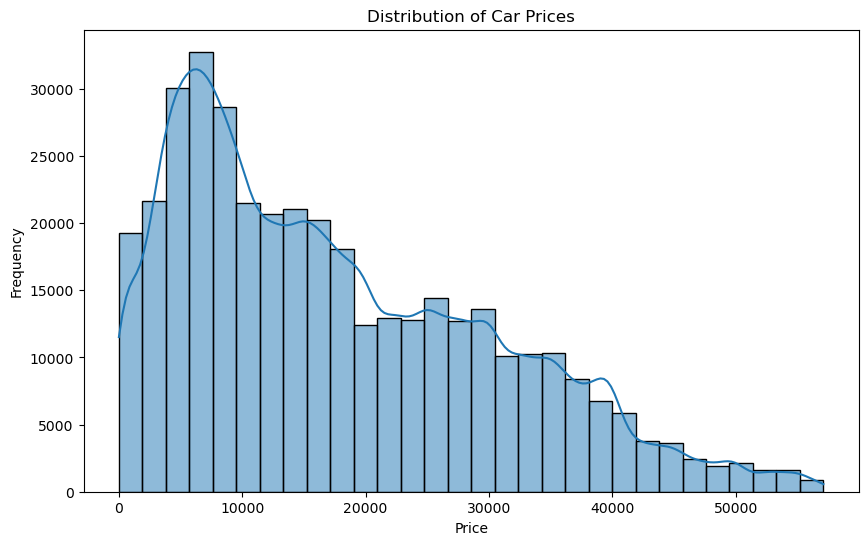

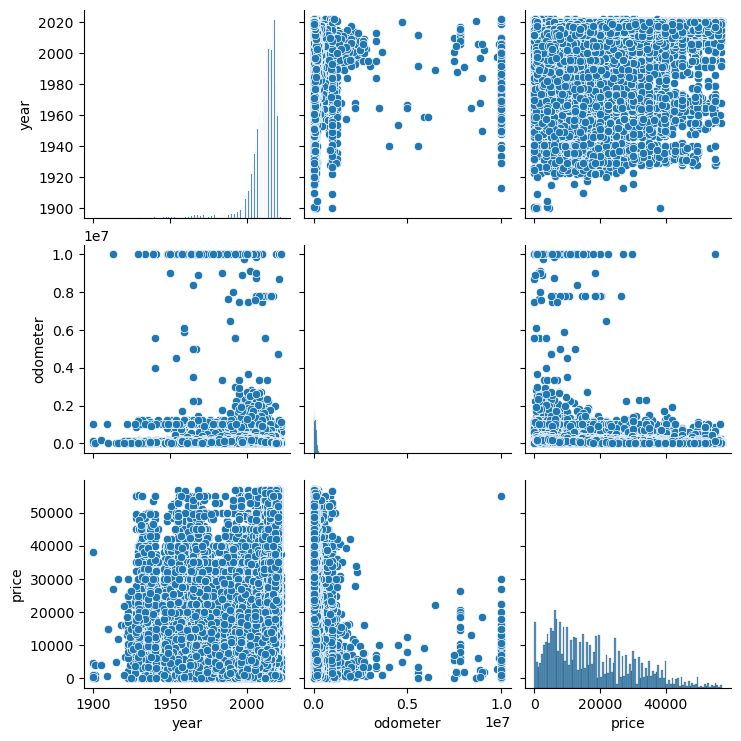

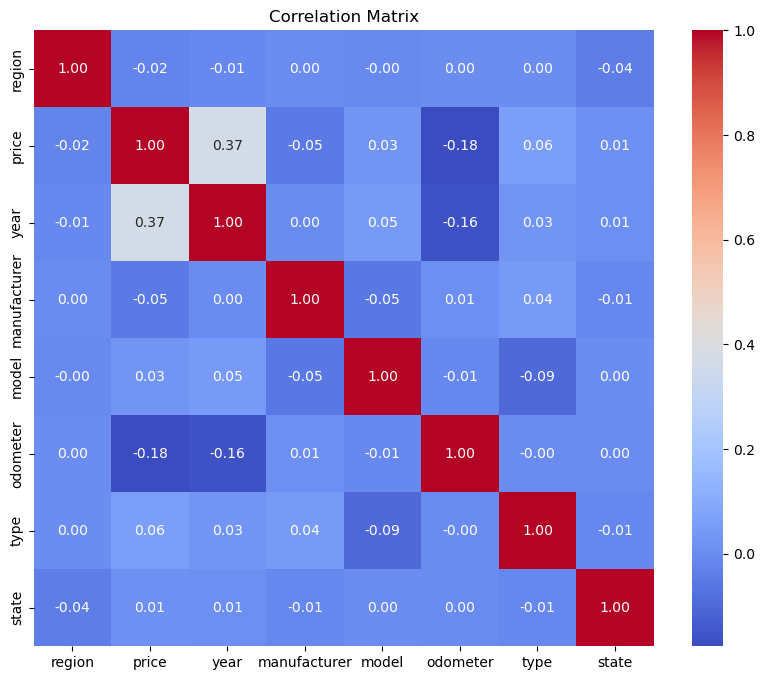

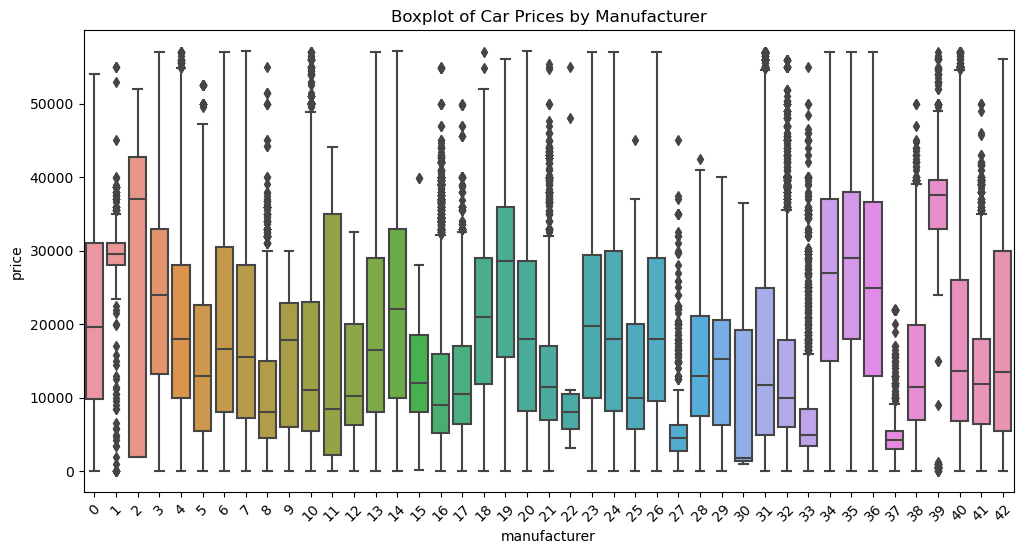

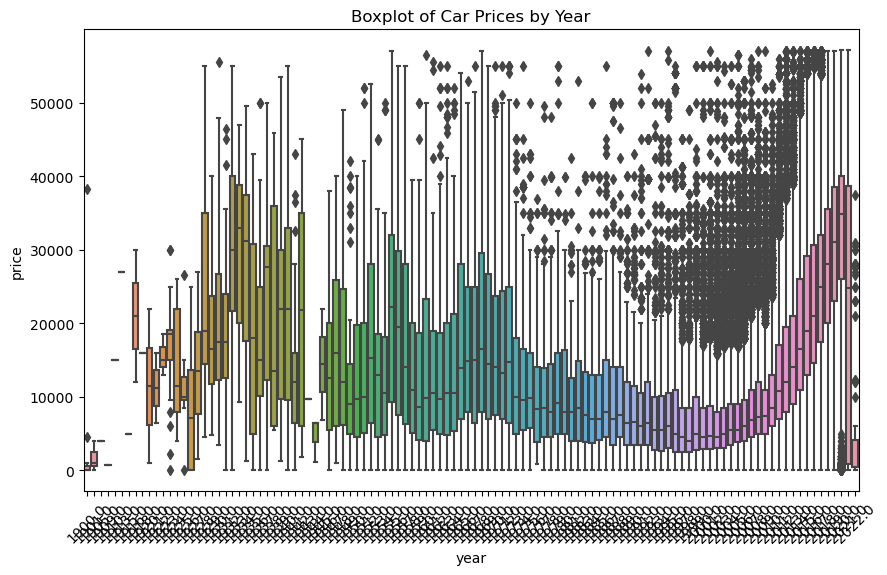

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Summary statistics of numerical features
print(vehicles.describe())

# Visualize the distribution of the target variable (car prices)
plt.figure(figsize=(10, 6))
sns.histplot(vehicles['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Pair plot to visualize relationships between numerical features
sns.pairplot(vehicles[['year', 'odometer', 'price']])
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr_matrix = vehicles.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Box plot for categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=vehicles)
plt.title('Boxplot of Car Prices by Manufacturer')
plt.xticks(rotation=45)
plt.show()

# Box plot for year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='price', data=vehicles)
plt.title('Boxplot of Car Prices by Year')
plt.xticks(rotation=45)
plt.show()


# Neural Network

In [10]:
#Need this otherwise it will throw an error when re-running the model
# Clear the current model and TensorFlow session
from keras.backend import clear_session
clear_session()

Before reshaping - y_train shape: (306129,)
After reshaping - y_train shape: (306129, 1)
Epoch 1/500
7654/7654 [==============================] - 4s 450us/step - loss: 138103264.0000 - mae: 8480.6465 - val_loss: 96609176.0000 - val_mae: 7286.9717
Epoch 2/500
7654/7654 [==============================] - 3s 424us/step - loss: 93770600.0000 - mae: 7200.9722 - val_loss: 94286960.0000 - val_mae: 7188.2690
Epoch 3/500
7654/7654 [==============================] - 3s 426us/step - loss: 92721536.0000 - mae: 7142.5308 - val_loss: 93641728.0000 - val_mae: 7161.4438
Epoch 4/500
7654/7654 [==============================] - 3s 423us/step - loss: 92243928.0000 - mae: 7118.2549 - val_loss: 93271720.0000 - val_mae: 7119.8960
Epoch 5/500
7654/7654 [==============================] - 3s 425us/step - loss: 91902184.0000 - mae: 7100.6128 - val_loss: 92911608.0000 - val_mae: 7105.3745
Epoch 6/500
7654/7654 [==============================] - 3s 425us/step - loss: 91617776.0000 - mae: 7085.7856 - val_loss: 925

Epoch 104/500
7654/7654 [==============================] - 3s 430us/step - loss: 70924992.0000 - mae: 5884.9438 - val_loss: 71981704.0000 - val_mae: 5884.5459
Epoch 105/500
7654/7654 [==============================] - 3s 427us/step - loss: 70808376.0000 - mae: 5876.2749 - val_loss: 71925232.0000 - val_mae: 5908.5972
Epoch 106/500
7654/7654 [==============================] - 3s 430us/step - loss: 70697344.0000 - mae: 5870.6665 - val_loss: 71740968.0000 - val_mae: 5876.2827
Epoch 107/500
7654/7654 [==============================] - 3s 429us/step - loss: 70582552.0000 - mae: 5862.7549 - val_loss: 71636160.0000 - val_mae: 5879.4336
Epoch 108/500
7654/7654 [==============================] - 3s 432us/step - loss: 70475944.0000 - mae: 5856.9526 - val_loss: 71590664.0000 - val_mae: 5871.3550
Epoch 109/500
7654/7654 [==============================] - 3s 431us/step - loss: 70365328.0000 - mae: 5850.0425 - val_loss: 71424496.0000 - val_mae: 5860.8682
Epoch 110/500
7654/7654 [=====================

7654/7654 [==============================] - 3s 432us/step - loss: 64553052.0000 - mae: 5510.0806 - val_loss: 65419736.0000 - val_mae: 5515.5728
Epoch 207/500
7654/7654 [==============================] - 3s 433us/step - loss: 64521976.0000 - mae: 5509.1733 - val_loss: 65594628.0000 - val_mae: 5519.4434
Epoch 208/500
7654/7654 [==============================] - 3s 434us/step - loss: 64507260.0000 - mae: 5508.9756 - val_loss: 65608136.0000 - val_mae: 5531.6089
Epoch 209/500
7654/7654 [==============================] - 3s 433us/step - loss: 64479940.0000 - mae: 5505.7192 - val_loss: 65529276.0000 - val_mae: 5521.4375
Epoch 210/500
7654/7654 [==============================] - 3s 434us/step - loss: 64479284.0000 - mae: 5505.8535 - val_loss: 65361184.0000 - val_mae: 5526.4209
Epoch 211/500
7654/7654 [==============================] - 3s 433us/step - loss: 64462940.0000 - mae: 5504.6455 - val_loss: 65461216.0000 - val_mae: 5524.0513
Epoch 212/500
7654/7654 [==============================] - 3

7654/7654 [==============================] - 3s 436us/step - loss: 62652100.0000 - mae: 5403.3384 - val_loss: 63764544.0000 - val_mae: 5431.2441
Epoch 309/500
7654/7654 [==============================] - 3s 432us/step - loss: 62640160.0000 - mae: 5403.5024 - val_loss: 63533616.0000 - val_mae: 5400.7124
Epoch 310/500
7654/7654 [==============================] - 3s 432us/step - loss: 62630196.0000 - mae: 5404.2959 - val_loss: 63488560.0000 - val_mae: 5401.0088
Epoch 311/500
7654/7654 [==============================] - 3s 432us/step - loss: 62611696.0000 - mae: 5400.9575 - val_loss: 63421844.0000 - val_mae: 5398.0767
Epoch 312/500
7654/7654 [==============================] - 3s 433us/step - loss: 62585948.0000 - mae: 5400.4214 - val_loss: 63407292.0000 - val_mae: 5414.3076
Epoch 313/500
7654/7654 [==============================] - 3s 437us/step - loss: 62592172.0000 - mae: 5401.4116 - val_loss: 63367080.0000 - val_mae: 5406.8940
Epoch 314/500
7654/7654 [==============================] - 3

7654/7654 [==============================] - 3s 431us/step - loss: 60696672.0000 - mae: 5289.0771 - val_loss: 61549864.0000 - val_mae: 5300.5107
Epoch 411/500
7654/7654 [==============================] - 3s 433us/step - loss: 60698360.0000 - mae: 5290.2329 - val_loss: 61637388.0000 - val_mae: 5310.6011
Epoch 412/500
7654/7654 [==============================] - 3s 434us/step - loss: 60674812.0000 - mae: 5289.2295 - val_loss: 61620612.0000 - val_mae: 5311.3843
Epoch 413/500
7654/7654 [==============================] - 3s 436us/step - loss: 60672040.0000 - mae: 5288.6343 - val_loss: 61425524.0000 - val_mae: 5279.3828
Epoch 414/500
7654/7654 [==============================] - 3s 431us/step - loss: 60660732.0000 - mae: 5288.4673 - val_loss: 61462860.0000 - val_mae: 5302.4233
Epoch 415/500
7654/7654 [==============================] - 3s 432us/step - loss: 60613720.0000 - mae: 5287.8237 - val_loss: 61528104.0000 - val_mae: 5296.0586
Epoch 416/500
7654/7654 [==============================] - 3

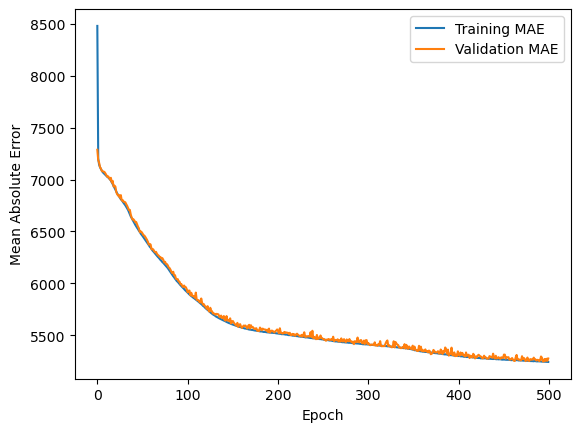

In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = vehicles.drop('price', axis=1)
y = vehicles['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

print("Before reshaping - y_train shape:", y_train.shape)

# Ensure that the target variable is a 2D array
y_train = y_train.values.reshape(-1, 1).astype(np.float32)

# Print the shape after reshaping
print("After reshaping - y_train shape:", y_train.shape)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

# Optionally, plot training history
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


In [51]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')


2392/2392 [==============================] - 1s 234us/step - loss: 60215948.0000 - mae: 5256.9224
Mean Absolute Error on Test Set: 5256.92236328125


In [52]:
# Make predictions
predictions = model.predict(X_test_scaled)

2392/2392 [==============================] - 1s 200us/step


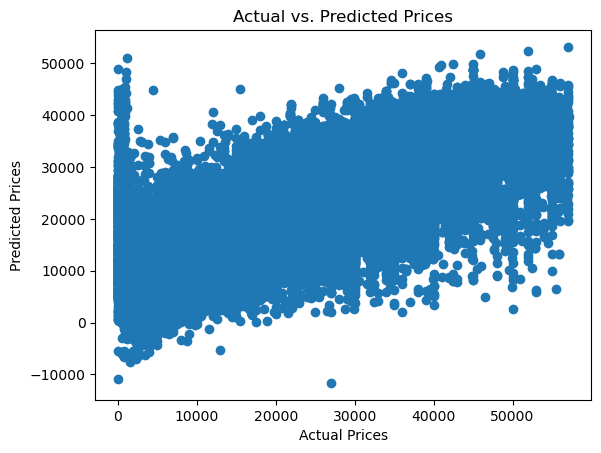

In [53]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [54]:
from sklearn.metrics import r2_score
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')

2392/2392 [==============================] - 0s 202us/step
R-squared on Test Set: 0.6291740597019908


## Decision Trees regression

Mean Absolute Error on Test Set: 2749.8302494257177
R-squared on Test Set: 0.7624379399644499


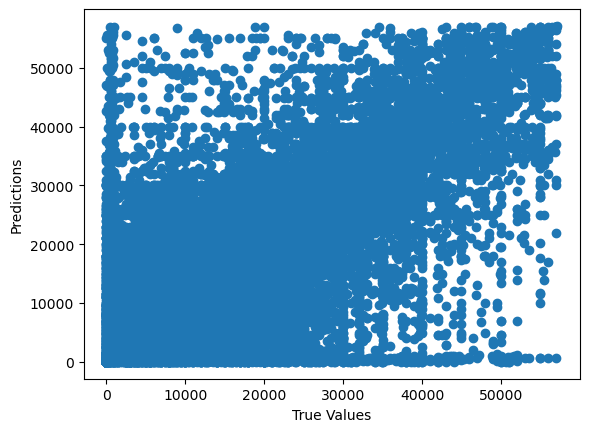

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X = vehicles.drop('price', axis=1)
y = vehicles['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')

# Optionally, plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


## Random Forest Regression

Mean Absolute Error on Test Set: 2276.3656825641274
R-squared on Test Set: 0.8725624449943988


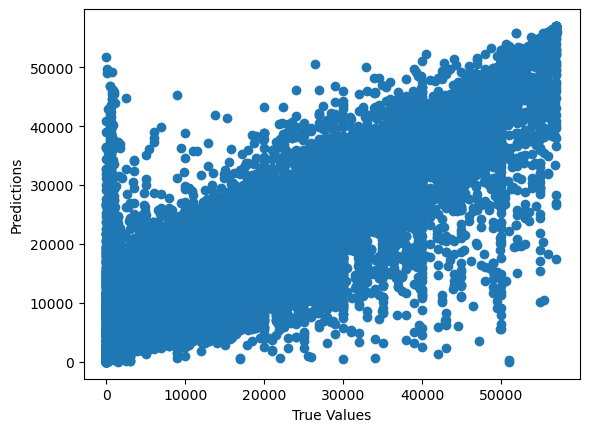

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X = vehicles.drop('price', axis=1)
y = vehicles['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error on Test Set: {mae}')
print(f'R-squared on Test Set: {r2}')

# Optionally, plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


## Data Exploration with Clustering?